In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('newmarkss.csv')


In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


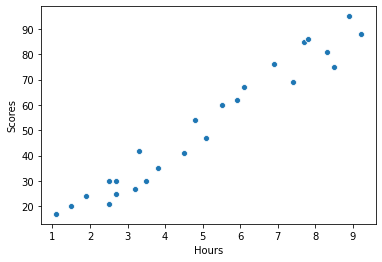

In [6]:
sns.scatterplot(df['Hours'],df['Scores'])

In [7]:
x=df['Hours']
y=df['Scores']
x1=df['Hours']
y1=df['Scores']
x1=pd.Series(x1) 

In [8]:
x=pd.array(x)
y=pd.array(y)
x=pd.DataFrame(x,columns=['Hours']) 
y=pd.DataFrame(y,columns=['Score']) 
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [9]:
xt=['16']
xt= pd.Series(xt) 
xt=pd.array(xt)
xt=pd.DataFrame(xt,columns=['Hours']) 
xt

,Hours
0,16


# polynomial regression for prediction of score

In [10]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression   
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(x.values.reshape(-1, 1)) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
X_poly

array([[  1.   ,   2.5  ,   6.25 ,  15.625],
       [  1.   ,   5.1  ,  26.01 , 132.651],
       [  1.   ,   3.2  ,  10.24 ,  32.768],
       [  1.   ,   8.5  ,  72.25 , 614.125],
       [  1.   ,   3.5  ,  12.25 ,  42.875],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       [  1.   ,   9.2  ,  84.64 , 778.688],
       [  1.   ,   5.5  ,  30.25 , 166.375],
       [  1.   ,   8.3  ,  68.89 , 571.787],
       [  1.   ,   2.7  ,   7.29 ,  19.683],
       [  1.   ,   7.7  ,  59.29 , 456.533],
       [  1.   ,   5.9  ,  34.81 , 205.379],
       [  1.   ,   4.5  ,  20.25 ,  91.125],
       [  1.   ,   3.3  ,  10.89 ,  35.937],
       [  1.   ,   1.1  ,   1.21 ,   1.331],
       [  1.   ,   8.9  ,  79.21 , 704.969],
       [  1.   ,   2.5  ,   6.25 ,  15.625],
       [  1.   ,   1.9  ,   3.61 ,   6.859],
       [  1.   ,   6.1  ,  37.21 , 226.981],
       [  1.   ,   7.4  ,  54.76 , 405.224],
       [  1.   ,   2.7  ,   7.29 ,  19.683],
       [  1.   ,   4.8  ,  23.04 , 110.592],
       [  

In [11]:
yz=lin2.predict(poly.fit_transform(x.values.reshape(-1, 1)))
yz=pd.DataFrame(yz,columns=['Score']) 
yz

,Score
0,25.558204
1,52.404490
2,31.563904
3,85.435356
4,34.505885
5,19.719350
6,88.240710
7,57.105861
8,84.272336
9,27.136009


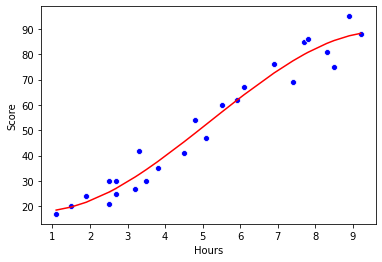

In [12]:
sns.scatterplot(x['Hours'], y['Score'], color = 'blue') 
  
sns.lineplot(x['Hours'],yz['Score'], color = 'red') 


In [35]:
predi1=lin2.predict(poly.fit_transform(xt))

In [36]:
predi1

array([[162.04128479]])

## prediction of score using XGboost


In [14]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.50,0.75,1]
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
hyperparameter_grid={
          'n_estimators':n_estimators,
           'max_depth':max_depth,
           'learning_rate':learning_rate,
            'min_child_weight':min_child_weight,
            'booster':booster,
            'base_score':base_score    
}
random_cv=RandomizedSearchCV(estimator=regressor,
                            param_distributions=hyperparameter_grid,
                            cv=5,n_iter=50,
                            scoring='neg_mean_absolute_error',
                            n_jobs=4,
                            verbose=5,
                            return_train_score=True,
                            random_state=42)
random_cv.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    4.0s


[19:17:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    6.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [15]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=None, max_depth=2,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=1, verbosity=None)

In [16]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=1, colsample_bytree=1, gamma=None, gpu_id=-1,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.25, max_delta_step=0, max_depth=2,
             min_child_weight=2, missing=None, monotone_constraints=None,
              n_jobs=0, num_parallel_tree=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None,n_estimators= 100,
            )

In [17]:
regressor.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))


[19:17:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bynode, colsample_bytree, max_delta_step, max_depth, min_child_weight, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=1, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=1, colsample_bytree=1, gamma=None, gpu_id=-1,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.25, max_delta_step=0, max_depth=2,
             min_child_weight=2, missing=None, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
predi2=regressor.predict(xt.values.reshape(-1,1))
predi2

array([86.594826], dtype=float32)

# prediction of score using random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x,y)

C:\Users\Siddharth\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [20]:
predi3=rf.predict(xt)
predi3

array([88.249])

# prediction of the score using PLS regression. 
# PLS regresion has been chosen here because the size of the training data is small

In [21]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
# Define PLS object
pls = PLSRegression(n_components=1)
# Fit
pls.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
# Cross-validation
predi4 = pls.predict(xt.values.reshape(-1, 1))
predi4

array([[92.90985477]])

## from the training data we can see that for 9.2 hrs student score 88, out of all ml model XGboost gives 86 marks for 9.25 hrs. so we can reject this model, and take the average of all the other model.


In [22]:
final=(predi1+predi2+predi4)/3
final

array([[89.28786728]])

# we will use polynomial regression for deployement in production using flask and heroku

In [23]:

import pickle
filename = 'student_score.pkl'
pickle.dump(rf, open(filename, 'wb'))